In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf
from scipy.special import betainc

In [2]:
class generator:
    def __init__(self,seed,const,mod,next_seed=True):
        self.start_seed=seed
        self.seed=seed
        self.const=const
        self.mod=mod
        self.k=len(const)-1
        self.next_seed=next_seed
        
    def restart(self):
        self.seed=self.start_seed
    
    
    def generate(self,n):
        random=np.zeros(n+self.k,dtype=int)
        random[0:self.k]=self.seed
        
        for i in range(n):
            random[self.k+i]=int(sum(self.const[1:]*random[i:self.k+i])+self.const[0]) % self.mod
        
        
        if(self.next_seed):
            self.seed=random[n:self.k+n]
            
        return random[self.k:]
    
    def uniform(self,n,left=0,right=1):
        return (self.generate(n)/(self.mod-1))*(right-left)+left
    
    def elimination(self,n,g,left_g,right_g,max_g):
        random=np.zeros(n)
        for i in range(n):
            while(True):
                X=self.uniform(1,left_g,right_g)[0]
                Y=self.uniform(1,0,max_g)[0]
                if(Y<=g(X)):
                    random[i]=X
                    break
        
        return random
    
    def elimination_mod(self,n,g,max_g,a,max_rand):
        random=np.zeros(n)
        for i in range(n):
            while(True):
                X=max_rand(1)[0]
                Y=self.uniform(1)[0]
                if(Y<=g(X)/(a*max_g(X))):
                    random[i]=X
                    break
        
        return random
    
    
    def normal(self,n,u=0,sigma=1,eps=10**-12):
        U1=self.uniform(n)
        U2=self.uniform(n)
        Z=np.sqrt(-2*(np.log(U1+eps)-eps))*np.cos(2*math.pi*U2)
        return Z*sigma+u
    
    def binomial(self,n,n_p,p):
        random=np.zeros(n,dtype=int)
        for i in range(n):
            X=0
            for j in range(n_p):
                U=self.uniform(1)[0]
                if U<p:
                    X+=1
            random[i]=X
        
        return random
    
    def poisson(self,n,lambd=1,eps=10**-12):
        random=np.zeros(n,dtype=int)
        for i in range(n):
            X=0
            t=self.exponential(1,lambd=lambd,eps=eps)[0]
            while(t<=1):
                t+=self.exponential(1,lambd=lambd,eps=eps)[0]
                X+=1
            
            random[i]=X
        
        return random
        
    def poisson2(self,n,lambd=1):
        def g(x):
            return math.e**(-1*lambd)*lambd**x/math.factorial(x)
        
        random=np.zeros(n,dtype=int)
        G=[g(x) for x in range(5)]
        calc=len(G)
        for i in range(n):
            U=self.uniform(1)[0]
            if U==0:
                random[i]=0
            
            cum=0
            j=0
            while(True):
                if j<calc:
                    temp=G[j]
                else:
                    G.append(g(j))
                    calc+=1
                
                if(U>cum and U<=cum+temp):
                    random[i]=j
                    break
                
                cum+=temp
                j+=1
                
        return random
    
    
    def exponential(self,n,lambd=1,eps=10**-12):
        U=self.uniform(n)
        return(-1/lambd*(np.log(1-U+eps)-eps))
    
    def discrete(self,n,x,p):
        random=np.zeros(n,dtype=int)
        for i in range(n):
            U=self.uniform(1)[0]
            if U==0:
                random[i]=x[0]
            
            cum=0
            j=0
            while(True):
                temp=p[j]
                if(U>cum and U<=cum+temp):
                    random[i]=x[j]
                    break
                
                cum+=temp
                j+=1
                
        return random
        
        

In [204]:
gen=generator([13,12],np.array([3,5,7]),117)

In [3]:
#zadanie1
gen=generator(123,[math.floor(math.e*10**9),math.floor(math.pi*10**9)],2**32)

In [206]:
r=gen.uniform(10000)

(array([ 985.,  974.,  971., 1006., 1054.,  973., 1025., 1034.,  993.,
         985.]),
 array([1.89025654e-04, 1.00148809e-01, 2.00108593e-01, 3.00068377e-01,
        4.00028160e-01, 4.99987944e-01, 5.99947728e-01, 6.99907511e-01,
        7.99867295e-01, 8.99827079e-01, 9.99786862e-01]),
 <a list of 10 Patch objects>)

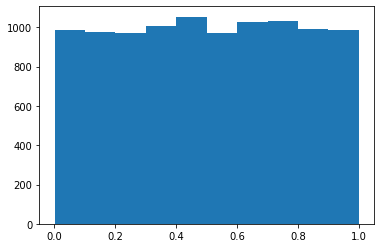

In [207]:
plt.hist(r)

In [208]:
#zadanie2
gen.restart()
def g(x):
    return(1+np.cos(x))/(1+math.e**(-1/2))*(math.e**(x**2/-2))/(math.sqrt(2*math.pi))

In [209]:
def normal_g(x):
    return((math.e**(x**2/-2))/(math.sqrt(2*math.pi)))

In [210]:
r=gen.elimination_mod(10000,g=g,max_g=normal_g,a=2/(1+math.e**(-1/2)),max_rand=gen.normal)

(array([   2.,    4.,   23.,   85.,  139.,  329.,  585.,  841., 1188.,
        1313., 1410., 1335., 1100.,  776.,  457.,  249.,  100.,   42.,
          19.,    3.]),
 array([-2.97768321, -2.68929837, -2.40091353, -2.1125287 , -1.82414386,
        -1.53575902, -1.24737418, -0.95898935, -0.67060451, -0.38221967,
        -0.09383483,  0.19455001,  0.48293484,  0.77131968,  1.05970452,
         1.34808936,  1.63647419,  1.92485903,  2.21324387,  2.50162871,
         2.79001355]),
 <a list of 20 Patch objects>)

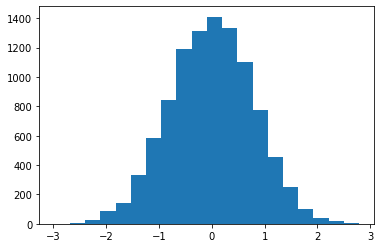

In [211]:
plt.hist(r,bins=20)

In [212]:
t=np.linspace(min(r),max(r),10000)

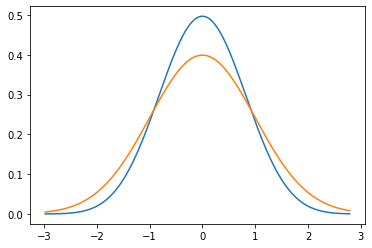

In [214]:
plt.plot(t,g(t))
plt.plot(t,normal_g(t))

(array([1.379e+03, 0.000e+00, 2.705e+03, 0.000e+00, 2.635e+03, 0.000e+00,
        1.862e+03, 0.000e+00, 8.840e+02, 0.000e+00, 0.000e+00, 3.460e+02,
        0.000e+00, 1.370e+02, 0.000e+00, 4.500e+01, 0.000e+00, 6.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

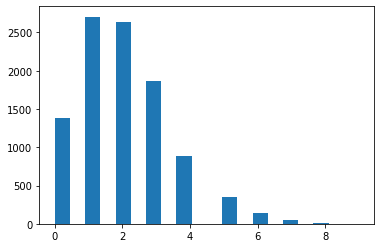

In [215]:
#zadanie 3
gen.restart()
r=gen.poisson(10000,lambd=2)
plt.hist(r,bins=20)

(array([1.318e+03, 0.000e+00, 2.685e+03, 0.000e+00, 2.756e+03, 0.000e+00,
        1.835e+03, 0.000e+00, 8.770e+02, 0.000e+00, 0.000e+00, 3.680e+02,
        0.000e+00, 1.090e+02, 0.000e+00, 4.100e+01, 0.000e+00, 1.000e+01,
        0.000e+00, 1.000e+00]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

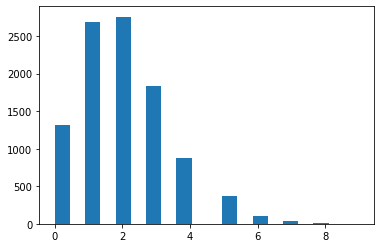

In [216]:
gen.restart()
r=gen.poisson2(10000,lambd=2)
plt.hist(r,bins=20)

In [217]:
#zadanie 4
gen.restart()
wh=gen.discrete(10000,[1,2,3],[1/3,1/3,1/3])
bi=gen.binomial(sum(wh==1),10,1/3)
nor=gen.normal(sum(wh==2))
ex=gen.exponential(sum(wh==3))



In [218]:
tot=np.concatenate([bi,nor,ex],axis=0)

In [219]:
t=np.linspace(min(tot),max(tot),10000)

In [220]:
tot.sort()

In [221]:
x=np.arange(0,10000,1)

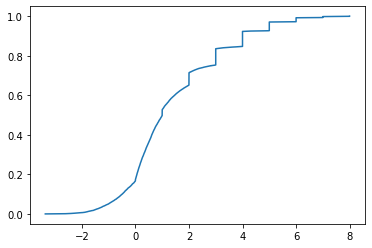

In [222]:
plt.plot(tot,x/10000)

In [223]:
def tot_dys(x):
    return(1/3*1/2*(1+erf(x/math.sqrt(2)))+1/3*betainc(10-np.floor(x*(x>0)),np.floor(x*(x>0))+1,1-1/3)+1/3*(1-math.e**(-1*x*(x>0))))

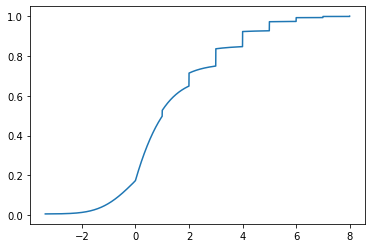

In [224]:
theo=tot_dys(t)
plt.plot(t,theo)


In [ ]:
#zadanie5
#cc -fPIC -shared -o libfun.so KISS.c

In [225]:
from ctypes import *
so_file = "/home/olaf/Desktop/Matematyka-Finansowa/KISS.so"
my_functions = CDLL(so_file)

In [226]:
my_functions.JKISS()/4294967296.0+0.5

0.7322860585991293

In [255]:
%%time
my_functions.JKISS()

CPU times: user 32 µs, sys: 3 µs, total: 35 µs
Wall time: 52.5 µs


-244323162

In [232]:
import random

In [263]:
%%time
random.random()

CPU times: user 20 µs, sys: 3 µs, total: 23 µs
Wall time: 37.2 µs


0.1802002804129219

In [293]:
%%time
gen.uniform(1)

CPU times: user 316 µs, sys: 38 µs, total: 354 µs
Wall time: 293 µs


array([0.00075642])

## LAB 2

In [ ]:
#zadanie 6

In [337]:
gen.restart()
r=gen.exponential(1000,lambd=3)

In [338]:
t=np.cumsum(r)

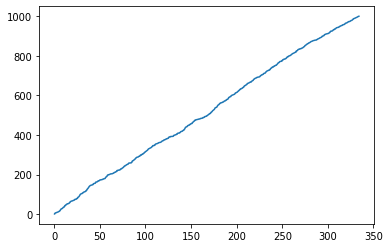

In [339]:
plt.plot(t,np.arange(1,1001,1))

In [7]:
def cholesky(S):  #S - macierz kwadratowa dodatnio okreslona
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            
            if (i == k):
                L[i][k] = math.sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
                
    return L

In [ ]:
#zadanie7

In [55]:
%%time
gen.restart()
r=gen.normal(1000)
t=np.arange(1,1001,1)
s=np.cumsum(r)

CPU times: user 21.4 ms, sys: 81 µs, total: 21.4 ms
Wall time: 24.1 ms


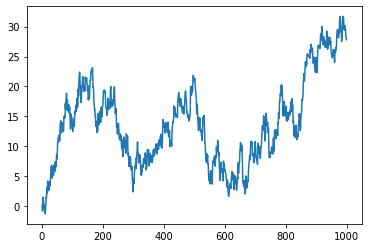

In [56]:
plt.plot(t,s)

In [57]:
%%time
gen.restart()
r=gen.normal(100)
sig=np.ones((100,100))
for i in range(1,100):
    sig[i,i:]=i+1
    
A=cholesky(sig)
A=np.array(A)
r=A.dot(r.reshape(-1,1))

CPU times: user 82.1 ms, sys: 3.75 ms, total: 85.9 ms
Wall time: 86.3 ms


In [361]:
A=cholesky(sig)

In [362]:
A=np.array(A)

In [5]:
r.reshape(-1,1)

array([[ 1.01560151e-01],
       [-9.71329760e-01],
       [ 8.19186207e-01],
       [ 1.50471778e+00],
       [-3.70717708e-01],
       [-8.87777570e-01],
       [ 2.20986782e-02],
       [-6.01664805e-01],
       [-5.07361404e-01],
       [-2.91955922e-01],
       [-1.65071556e-01],
       [ 8.00864592e-01],
       [ 8.98226381e-01],
       [ 1.06787201e+00],
       [-1.50918994e-01],
       [ 9.14247157e-01],
       [ 9.03421291e-01],
       [-9.77363124e-01],
       [ 2.04104470e+00],
       [-1.43673676e+00],
       [ 2.26870580e-01],
       [ 1.01772891e+00],
       [-1.37081596e+00],
       [ 6.52201353e-01],
       [ 7.13085632e-01],
       [-6.66660096e-01],
       [ 4.45426452e-01],
       [ 7.27488731e-01],
       [ 5.63080985e-01],
       [ 1.24254306e+00],
       [ 3.64614817e-01],
       [ 1.46726595e-01],
       [-1.76723573e+00],
       [-3.44789434e-01],
       [ 1.57752170e-01],
       [ 7.64980418e-01],
       [ 1.08227958e+00],
       [-1.50274643e+00],
       [ 5.6

In [58]:
#zadanie8
gen.restart()
r1=gen.normal(101)
r2=gen.normal(101)
r1[0]=0
r2[0]=0
t=np.arange(1,101,1)
s1=np.cumsum(r1)
s2=np.cumsum(r2)

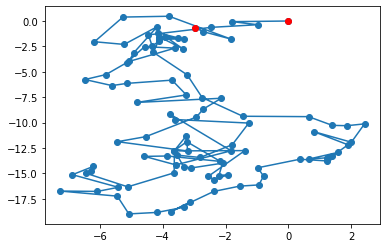

In [63]:
plt.plot(s1,s2,marker="o")
plt.plot(0,0,marker="o",c="red")
plt.plot(s1[-1],s2[-1],marker="o",c="red")

In [40]:
#zadanie9
#jest procesem wienera bo p**2 + 1-p**2 = 1
#wtedy V_t-V_s ~ N(0,t-s)

4.104685976756532

$$Cov(V^1,V^2)=E(W_1*(p*W_1 + sqrt(1-p^2)*W_2)/sqrt(t)*sqrt(t)=p*EW_1^2/t=p$$

In [ ]:
#wiec kowariancja jest faktycznie p

In [72]:
gen.restart()
r1=gen.normal(101)
r2=gen.normal(101)
r1[0]=0
r2[0]=0
t=np.arange(1,101,1)
s1=np.cumsum(r1)
s2=np.cumsum(r2)
p=0.9
v1=s1
v2=p*s1+np.sqrt(1-p**2)*s2


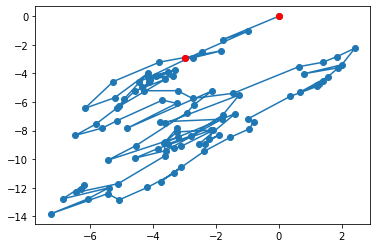

In [73]:
plt.plot(v1,v2,marker="o")
plt.plot(0,0,marker="o",c="red")
plt.plot(v1[-1],v2[-1],marker="o",c="red")

In [197]:
#zadanie 10
gen.restart()
r=gen.normal(1000000)
t=np.arange(3,10003,1)
#s=np.cumsum(r)

In [198]:
r=r.reshape(100,-1)

In [199]:
s=np.cumsum(r,axis=1)

In [200]:
def iter_log(x):
    return np.sqrt(2*x*np.log(np.log(x)))

In [201]:
l=iter_log(t)

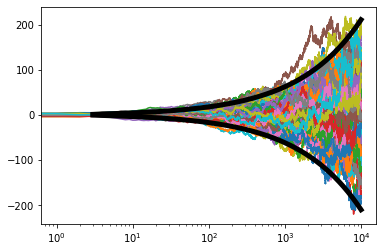

In [208]:
plt.plot(s.T)
plt.plot(t,l,linewidth=5,c="black")
plt.plot(t,-l,linewidth=5,c="black")
plt.xscale('log')